<center>
<img src="https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/home-credit-indonesia/Home_Credit_Normal_Logo.png" alt="Home Credit Indonesia" width="300"/>

Home Credit Indonesia Data Scientist Project Based Internship Program

Rakamin Virtual Internship Program Batch November 2023

**Final Task - Home Credit Scorecard Model**

</center>

# **Problem Research**

Home Credit Indonesia (HCI) wants to create machine learning to help the team determine whether the proposed loan is accepted or rejected. Then, from the existing data, HCI wants to find out what customer criteria are that often make loans and these loans are accepted to determine the next target market.

# **Data Pre-Processing**

## **Import Libraries**

In [1]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.linear_model import ElasticNet, LinearRegression, LogisticRegression, Perceptron, SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## **Download & Load Data**

In [2]:
!wget https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/home-credit-indonesia/home-credit-default-risk.zip

--2023-12-01 19:15:34--  https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/home-credit-indonesia/home-credit-default-risk.zip
Resolving rakamin-lms.s3.ap-southeast-1.amazonaws.com (rakamin-lms.s3.ap-southeast-1.amazonaws.com)... 52.219.36.67, 3.5.146.16, 3.5.150.173, ...
Connecting to rakamin-lms.s3.ap-southeast-1.amazonaws.com (rakamin-lms.s3.ap-southeast-1.amazonaws.com)|52.219.36.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 721616255 (688M) [application/zip]
Saving to: ‘home-credit-default-risk.zip’

home-credit-default 100%[===================>] 688.19M  21.4MB/s    in 34s     

2023-12-01 19:16:09 (20.2 MB/s) - ‘home-credit-default-risk.zip’ saved [721616255/721616255]



In [3]:
!unzip home-credit-default-risk.zip

Archive:  home-credit-default-risk.zip
  inflating: HomeCredit_columns_description.csv  
  inflating: POS_CASH_balance.csv    
  inflating: application_test.csv    
  inflating: application_train.csv   
  inflating: bureau.csv              
  inflating: bureau_balance.csv      
  inflating: credit_card_balance.csv  
  inflating: installments_payments.csv  
  inflating: previous_application.csv  
  inflating: sample_submission.csv   


In [4]:
train_df = pd.read_csv('application_train.csv')
train_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
test_df = pd.read_csv('application_test.csv')
test_df

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


## **Data Cleaning**

### **Duplicate**

In [6]:
train_df.duplicated().sum()

0

### **Missing Values**

In [7]:
col_na = train_df.isnull().sum().sort_values(ascending=True)
percent_na = col_na / len(train_df)

missing_data = pd.concat([col_na, percent_na], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total'] > 0]

,Total,Percent
DAYS_LAST_PHONE_CHANGE,1,0.000003
CNT_FAM_MEMBERS,2,0.000007
AMT_ANNUITY,12,0.000039
AMT_GOODS_PRICE,278,0.000904
EXT_SOURCE_2,660,0.002146
...,...,...
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
NONLIVINGAPARTMENTS_MODE,213514,0.694330
COMMONAREA_MODE,214865,0.698723
COMMONAREA_AVG,214865,0.698723


#### **Drop Column with >50% Missing Value**

In [8]:
missing_data[missing_data['Percent'] > 0.5]

,Total,Percent
HOUSETYPE_MODE,154297,0.501761
LIVINGAREA_AVG,154350,0.501933
LIVINGAREA_MODE,154350,0.501933
LIVINGAREA_MEDI,154350,0.501933
ENTRANCES_AVG,154828,0.503488
ENTRANCES_MODE,154828,0.503488
ENTRANCES_MEDI,154828,0.503488
APARTMENTS_MEDI,156061,0.507497
APARTMENTS_AVG,156061,0.507497
APARTMENTS_MODE,156061,0.507497


In [9]:
drop_missing_column = missing_data[missing_data['Percent'] > 0.5].index.to_list()
drop_missing_column

['HOUSETYPE_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'ENTRANCES_MEDI',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'WALLSMATERIAL_MODE',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'EXT_SOURCE_1',
 'BASEMENTAREA_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'LANDAREA_MEDI',
 'LANDAREA_AVG',
 'LANDAREA_MODE',
 'OWN_CAR_AGE',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MODE',
 'COMMONAREA_MODE',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI']

In [10]:
train_df_drop_na = train_df.drop(drop_missing_column, axis=1)
train_df_drop_na

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
test_df_drop_na = test_df.drop(drop_missing_column, axis=1)
test_df_drop_na

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


#### **Fill the Rest Missing Values**

In [12]:
train_df_fill_na = train_df_drop_na.copy()
test_df_fill_na = test_df_drop_na.copy()

In [13]:
numeric_columns = train_df_drop_na.select_dtypes(include='number')
numeric_columns = numeric_columns.columns.to_list()
numeric_columns.remove('TARGET')
numeric_columns

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMEN

In [14]:
categoric_columns = train_df_drop_na.select_dtypes(exclude='number')
categoric_columns = categoric_columns.columns.to_list()
categoric_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

In [15]:
train_df_fill_na[numeric_columns] =  train_df_drop_na[numeric_columns].fillna(train_df_drop_na[numeric_columns].median())
test_df_fill_na[numeric_columns] =  test_df_drop_na[numeric_columns].fillna(test_df_drop_na[numeric_columns].median())

In [16]:
train_df_fill_na[categoric_columns] =  train_df_drop_na[categoric_columns].fillna('Unknown')
test_df_fill_na[categoric_columns] =  test_df_drop_na[categoric_columns].fillna('Unknown')

### **Outlier**

In [17]:
def count_outlier(df):
  Jumlah_Outlier = []

  for i in df.columns:

    # Melakukan looping untuk mencari outlier setiap kolom yang isinya bukan tipe data object
    if (df[i].dtypes != 'object'):
      data = df[i]

      # Mencari nilai IQR
      Q1 = data.quantile(0.25)
      Q3 = data.quantile(0.75)
      IQR = Q3 - Q1

      # Mencari RUB dan RLB
      RLB = Q1 - 1.5 * IQR
      RUB = Q3 + 1.5 * IQR

      # Mencari banyak outlier
      outlier_lower = data[data < RLB]
      outlier_upper = data[data > RUB]
      jumlah_outlier = len(outlier_lower) + len(outlier_upper)
      if (len(df) != 0):
        persentase_outlier = jumlah_outlier/len(df)
      else:
        persentase_outlier = "Tidak Terdefinisi (Banyaknya baris = 0)"

      Jumlah_Outlier.append([i, jumlah_outlier, persentase_outlier])

  return pd.DataFrame(Jumlah_Outlier, columns=['Column', 'Jumlah Outliers', 'Persentase Outliers']).sort_values(by=['Jumlah Outliers'], ascending = False, ignore_index=True)

In [18]:
count_outlier_df = count_outlier(train_df_drop_na)
count_outlier_df

,Column,Jumlah Outliers,Persentase Outliers
0,REGION_RATING_CLIENT,80527,0.261867
1,REGION_RATING_CLIENT_W_CITY,78027,0.253737
2,DAYS_EMPLOYED,72217,0.234844
3,REG_CITY_NOT_WORK_CITY,70867,0.230454
4,FLAG_WORK_PHONE,61308,0.199368
...,...,...,...
63,EXT_SOURCE_3,0,0.000000
64,EXT_SOURCE_2,0,0.000000
65,FLAG_PHONE,0,0.000000
66,FLAG_DOCUMENT_3,0,0.000000


In [19]:
handle_outlier_column = count_outlier_df[count_outlier_df['Jumlah Outliers'] > 0]['Column'].to_list()
handle_outlier_column

['REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'DAYS_EMPLOYED',
 'REG_CITY_NOT_WORK_CITY',
 'FLAG_WORK_PHONE',
 'FLAG_EMP_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_6',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_8',
 'TARGET',
 'REG_CITY_NOT_LIVE_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_WORK_REGION',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'LIVE_REGION_NOT_WORK_REGION',
 'TOTALAREA_MODE',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'REGION_POPULATION_RELATIVE',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'REG_REGION_NOT_LIVE_REGION',
 'FLAG_DOCUMENT_5',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_18',
 'HOUR_APPR_PROCESS_START',
 'A

In [20]:
def drop_outlier(df, handle_outlier_column):
  for column in handle_outlier_column:
    sorted_data = df.sort_values(by=column)[column]

    # Menghitung quartil 1 dan 3.
    Q1 = sorted_data.quantile(0.25)
    Q3 = sorted_data.quantile(0.75)

    # Menghitung RLB dan RUB.
    IQR = (Q3 - Q1)
    RLB = (Q1 - 1.5*IQR)
    RUB = (Q3 + 1.5*IQR)

    df = df.loc[(df[column] >= RLB) & (df[column] <= RUB)]

  return df

In [21]:
train_df_drop_outlier = train_df_drop_na.copy()
train_df_drop_outlier = drop_outlier(train_df_drop_outlier, handle_outlier_column)

count_outlier_drop = count_outlier(train_df_drop_outlier)
count_outlier_drop

,Column,Jumlah Outliers,Persentase Outliers
0,FLAG_PHONE,2480,0.199710
1,FLAG_DOCUMENT_3,1901,0.153084
2,TOTALAREA_MODE,637,0.051297
3,EXT_SOURCE_2,355,0.028588
4,AMT_INCOME_TOTAL,272,0.021904
...,...,...,...
63,EXT_SOURCE_3,0,0.000000
64,YEARS_BEGINEXPLUATATION_AVG,0,0.000000
65,FLOORSMAX_AVG,0,0.000000
66,FLOORSMAX_MODE,0,0.000000


After conducting experiments to remove outliers, it was found that there were still outliers based on the new data. Thus, it was decided that outliers would not be handled.

### **Encode**

In [22]:
train_df_fill_na = train_df_fill_na.copy()
test_df_fill_na = test_df_fill_na.copy()

In [23]:
train_df_numeric = train_df_fill_na.select_dtypes(include='number')
train_df_categoric = train_df_fill_na.select_dtypes(exclude='number')

In [24]:
train_df_categoric = pd.get_dummies(train_df_categoric, drop_first=True)

In [25]:
test_df_numeric = test_df_fill_na.select_dtypes(include='number')
test_df_categoric = test_df_fill_na.select_dtypes(exclude='number')

In [26]:
test_df_categoric = pd.get_dummies(test_df_categoric, drop_first=True)

In [27]:
train_df_final = pd.concat([train_df_categoric, train_df_numeric], axis=1)
test_df_final = pd.concat([test_df_categoric, test_df_numeric], axis=1)

# **Data Visualization and Business Insight**

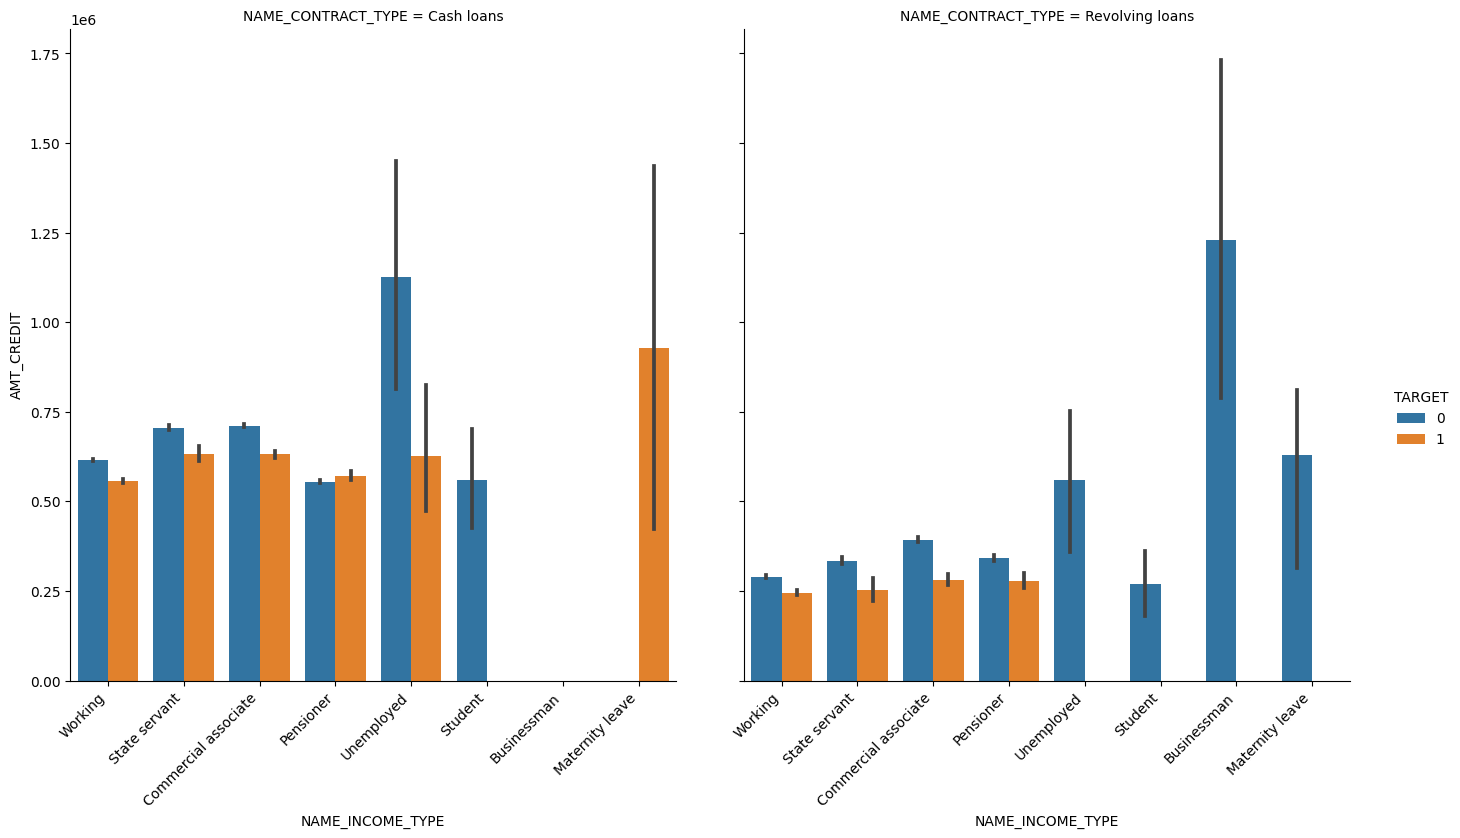

In [28]:
fig = sns.catplot(data=train_df, x='NAME_INCOME_TYPE', y='AMT_CREDIT',
                  hue='TARGET', col='NAME_CONTRACT_TYPE', kind='bar')
fig.set_xticklabels(rotation=45, horizontalalignment='right')

plt.gcf().set_size_inches(15, 8)
plt.show()

In [29]:
train_df.groupby(by=['OCCUPATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count().sort_values(by=['OCCUPATION_TYPE', 'TARGET', 'SK_ID_CURR'], ascending=[True, True, False])

,OCCUPATION_TYPE,TARGET,SK_ID_CURR
0,Accountants,0,9339
1,Accountants,1,474
2,Cleaning staff,0,4206
3,Cleaning staff,1,447
4,Cooking staff,0,5325
5,Cooking staff,1,621
6,Core staff,0,25832
7,Core staff,1,1738
8,Drivers,0,16496
9,Drivers,1,2107


In [30]:
train_df[['OCCUPATION_TYPE','SK_ID_CURR']].groupby(['OCCUPATION_TYPE'], as_index=False).count().sort_values(by=['SK_ID_CURR'], ascending=False)

,OCCUPATION_TYPE,SK_ID_CURR
8,Laborers,55186
14,Sales staff,32102
3,Core staff,27570
10,Managers,21371
4,Drivers,18603
6,High skill tech staff,11380
0,Accountants,9813
11,Medicine staff,8537
16,Security staff,6721
2,Cooking staff,5946


The 2 most interesting insights discovered were

1. Clients with a student income type can be said to be clients who are able to repay their loans either with cash loans or revolving loans (100% of applications are approved). However, only 0.005% of applications come from students.

2. A client who works as an accountant can be said to be a client who is able to repay his loan (95% of applications are approved). However, only 3.19% of applications came from accountants.

# **Machine Learning Implementation and Evaluation**

In [31]:
X = train_df_final.drop(['TARGET'], axis=1)
y = train_df_final['TARGET']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.8, random_state=2110)

In [33]:
def fit_and_score(models, X_train, y_train, X_test, y_test):
    model_scores = {}

    for name, model in models.items():
      print(name)
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)

      scores = {}
      scores["score"] = model.score(X_test, y_test)
      scores["accuracy"] = accuracy_score(y_test, y_pred)
      scores["precision-weighted"] = precision_score(y_test, y_pred, average='weighted')
      scores["recall-weighted"] = recall_score(y_test, y_pred, average='weighted')
      scores["f1-score-weighted"] = f1_score(y_test, y_pred, average='weighted')

      model_scores[name] = scores

    return model_scores

In [34]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gaussian": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=35000),
    "LinearSVC": LinearSVC(),
    "Percepton": Perceptron(),
    "SGD": SGDClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

fit_and_score_results = fit_and_score(models, X_train, y_train, X_test, y_test)

Decision Tree
Random Forest
Gaussian
Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LinearSVC


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Percepton


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SGD


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Adaboost
GradientBoostingClassifier


In [35]:
scores_df = pd.DataFrame(fit_and_score_results).transpose()

for c in scores_df.columns:
    scores_df[c] = scores_df[c].astype(float)

scores_df.drop('score', axis=1).sort_values('f1-score-weighted', ascending=False)

,accuracy,precision-weighted,recall-weighted,f1-score-weighted
Adaboost,0.919012,0.881799,0.919012,0.882487
GradientBoostingClassifier,0.919175,0.883524,0.919175,0.881994
Random Forest,0.919256,0.877376,0.919256,0.880662
Logistic Regression,0.919272,0.845061,0.919272,0.880606
Percepton,0.919272,0.845061,0.919272,0.880606
SGD,0.919272,0.845061,0.919272,0.880606
LinearSVC,0.918638,0.850434,0.918638,0.880384
Gaussian,0.913760,0.851282,0.913760,0.878758
Decision Tree,0.853162,0.861687,0.853162,0.857347


# **Business Recommendation**

Based on Business Insight and Machine Learning Model,

The Company should create a **campaign** to get **more** students, accountants, high-skilled technology staff and managers **interested** in applying for loans.

# **End of File**